<a href="https://colab.research.google.com/github/erkanthecodder/cat-and-dog/blob/main/cat_dog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#gerekli kütüphaneler tanımlanıyor

from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPool2D,MaxPooling2D,Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.preprocessing import image
import pandas as pd
import numpy as np
from keras.models import Sequential

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
img_size = [64,64,3]

In [ ]:
test = '/content/drive/MyDrive/test_set'
train = '/content/drive/MyDrive/training_set'

In [ ]:
#hazır veri setinden çekilen fotoğraflar yeniden boyutlandırılıyor
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
#Hazır veri setindeki resimlerin boyutuyla veri çıkışındaki fotoğrafların boyutlarını eşitliyor
training_set = train_datagen.flow_from_directory(train,
                                                 target_size = (64, 64),
                                                 batch_size = 16,
                                                 class_mode = 'categorical')

Found 681 images belonging to 2 classes.


In [ ]:
#aynı işlem test veriseti için yapılıyor
test_set = test_datagen.flow_from_directory(test,
                                            target_size = (64, 64),
                                            batch_size = 16,
                                            class_mode = 'categorical')

Found 701 images belonging to 2 classes.


In [ ]:
#sınıf tanımlanması yapılıyor (0indexi kedileri, 1 indexi köpekleri temsil ediyor)
training_set.class_indices

{'cats': 0, 'dogs': 1}

In [ ]:
#Sinirağı katmanında görseller iki boyutlu bir vektöre dönüşütürlüyor

model1 = Sequential()
model1.add(Conv2D(filters=32, kernel_size=3, input_shape=[64, 64, 3]))
model1.add(MaxPooling2D(pool_size=(2,2)))
model1.add(Conv2D(filters=64, kernel_size=3))
model1.add(MaxPooling2D(pool_size=(2,2)))
model1.add(Conv2D(filters=128, kernel_size=3))
model1.add(MaxPooling2D(pool_size=(2,2)))     

model1.add(Conv2D(filters=256, kernel_size=3))
model1.add(MaxPooling2D(pool_size=(2,2)))

model1.add(Dropout(0.5))                                                                        
model1.add(Flatten()) # neural network beulding
model1.add(Dense(units=128, activation='relu')) # input layers
model1.add(Dropout(0.1))                                    
model1.add(Dense(units=256, activation='relu'))                                    
model1.add(Dropout(0.25))             
model1.add(Dense(units=2, activation='softmax')) # output layer

In [ ]:
#optimize etmek için hazır fonksiyon kullanılıyor
model1.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
#model eğitilmeye başlıyor
history1 = model1.fit(
  training_set,
  validation_data=test_set,
  epochs=25,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/25
43/43 [==============================] - 182s 4s/step - loss: 0.6940 - accuracy: 0.5962 - val_loss: 0.7278 - val_accuracy: 0.4850
Epoch 2/25
43/43 [==============================] - 13s 297ms/step - loss: 0.6502 - accuracy: 0.6358 - val_loss: 0.7321 - val_accuracy: 0.4922
Epoch 3/25
43/43 [==============================] - 13s 297ms/step - loss: 0.6402 - accuracy: 0.6446 - val_loss: 0.8133 - val_accuracy: 0.4850
Epoch 4/25
43/43 [==============================] - 13s 296ms/step - loss: 0.6485 - accuracy: 0.6388 - val_loss: 0.8010 - val_accuracy: 0.4850
Epoch 5/25
43/43 [==============================] - 13s 296ms/step - loss: 0.6448 - accuracy: 0.6461 - val_loss: 0.7800 - val_accuracy: 0.4964
Epoch 6/25
43/43 [==============================] - 15s 340ms/step - loss: 0.6355 - accuracy: 0.6535 - val_loss: 0.9281 - val_accuracy: 0.4850
Epoch 7/25
43/43 [==============================] - 13s 299ms/step - loss: 0.6102 - accuracy: 0.6784 - val_loss: 0.7623 - val_accuracy: 0.5407
E

In [ ]:
#hazır model haline getirilip kaydediliyor
model1.save('Cat_Dog_classifier.h5')   # Dog:1 , Cat:0

In [ ]:
#hazır modelimizi içeri atıyor
from keras import models
model =models.load_model("Cat_Dog_classifier.h5")

In [40]:
#test için fotoğraf yükleniyor
# img_path = "/content/drive/MyDrive/datasets/cat_dog_dataset/Test_imgs/1.jpeg"
img_path = "/content/drive/MyDrive/test_set/dogs/dog.4001.jpg"

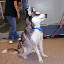

In [41]:
#yüklenen fotoğrafı yeniden boyutlandırıp açıyoruz
img=image.load_img(img_path,target_size=(64,64))
img

In [42]:
#tahmin edilen index 1 ise köpek değil ise kedi yazdırıyoruz
x=image.img_to_array(img)
x=x/255
x=np.expand_dims(x,axis=0)
pred = np.argmax(model.predict(x)[0], axis=-1)

if pred==1:
  print('DOG')
else:
  print("CAT")


DOG


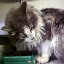

In [36]:
#aynı işlem kedi fotoğrafı için yapılıyor
image_path = "/content/drive/MyDrive/test_set/cats/cat.4094.jpg"
img=image.load_img(image_path,target_size=(64,64))
img

In [37]:
#tahmin edilen index 1 ise köpek değil ise kedi yazdırıyoruz
x=image.img_to_array(img)
x=x/255
x=np.expand_dims(x,axis=0)
pred = np.argmax(model.predict(x)[0], axis=-1)

if pred==1:
  print('DOG')
else:
  print("CAT")

CAT
